# Q1)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glass = pd.read_csv('/content/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass[glass.duplicated()].shape

(1, 10)

In [5]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [6]:
glass1 = glass.drop_duplicates()
glass1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Independent Variables

In [7]:
x= glass1.iloc[:,0:9].values
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [8]:
from sklearn.preprocessing import StandardScaler
# Normalization function
stscaler = StandardScaler().fit(x)
X = stscaler.transform(x)

In [9]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [10]:
df_knn = pd.DataFrame(X,columns=glass1.columns[:-1])
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [11]:
x= df_knn
y= glass1['Type']

In [12]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

Splitting the Data into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [15]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
185,0.010659,1.124177,0.403249,1.557355,-1.819617,1.474913,-2.224265,2.925383,-0.588301
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,-0.765554,-0.473863,3.086325,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,0.170531,-0.748022,-0.353808,-0.588301
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,0.109149,-0.480893,-0.353808,0.541526
...,...,...,...,...,...,...,...,...,...
32,-0.197547,-0.680073,0.555995,-0.443617,0.407845,0.170531,-0.277031,-0.172748,1.671354
124,0.123025,-0.581882,0.680969,0.223374,-0.187871,0.124494,-0.284060,-0.353808,0.644238
131,-0.071962,0.031808,0.903145,-0.544676,-0.213772,0.124494,-0.565249,-0.353808,-0.588301
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,0.109149,-0.101287,-0.353808,0.336103


In [16]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
83,-1.407130,1.038260,0.285217,1.274389,-0.485730,0.922469,-1.317430,-0.353808,-0.588301
62,1.296254,0.940070,0.785114,-1.353149,-1.690113,-0.765554,0.517328,-0.353808,-0.588301
84,-0.693278,-0.054108,0.625425,0.081891,0.084086,-0.074999,-0.523071,-0.353808,-0.588301
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301
187,1.362351,1.786963,-0.332710,1.233966,-3.101703,0.400716,0.566537,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
115,-0.019084,-0.201394,0.847601,-0.079804,-0.420978,0.078457,-0.452774,-0.353808,0.438815
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
28,-0.220682,-1.036013,0.583767,-0.039380,0.640952,0.109149,-0.291090,-0.353808,-0.588301
113,0.040403,-0.373227,0.896202,-0.524464,-0.278524,0.155186,-0.368417,-0.353808,-0.588301


In [17]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [18]:
y_test

84     2
63     1
85     2
138    2
188    7
      ..
116    2
4      1
28     1
114    2
126    2
Name: Type, Length: 64, dtype: int64

KNN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    29
2    23
7     7
3     3
5     2
dtype: int64

In [21]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,7
Type,,,,,
1,16,2,1,0,0
2,6,19,2,1,0
3,6,2,0,0,0
7,1,0,0,1,7


In [22]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 65.625


In [23]:
model.score(x_train,y_train)

0.825503355704698

In [24]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.83      0.68      0.75        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.66        64
   macro avg       0.48      0.46      0.46        64
weighted avg       0.67      0.66      0.65        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Grid Search for Algorithm Tuning

In [25]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [26]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


Visualizing the CV results

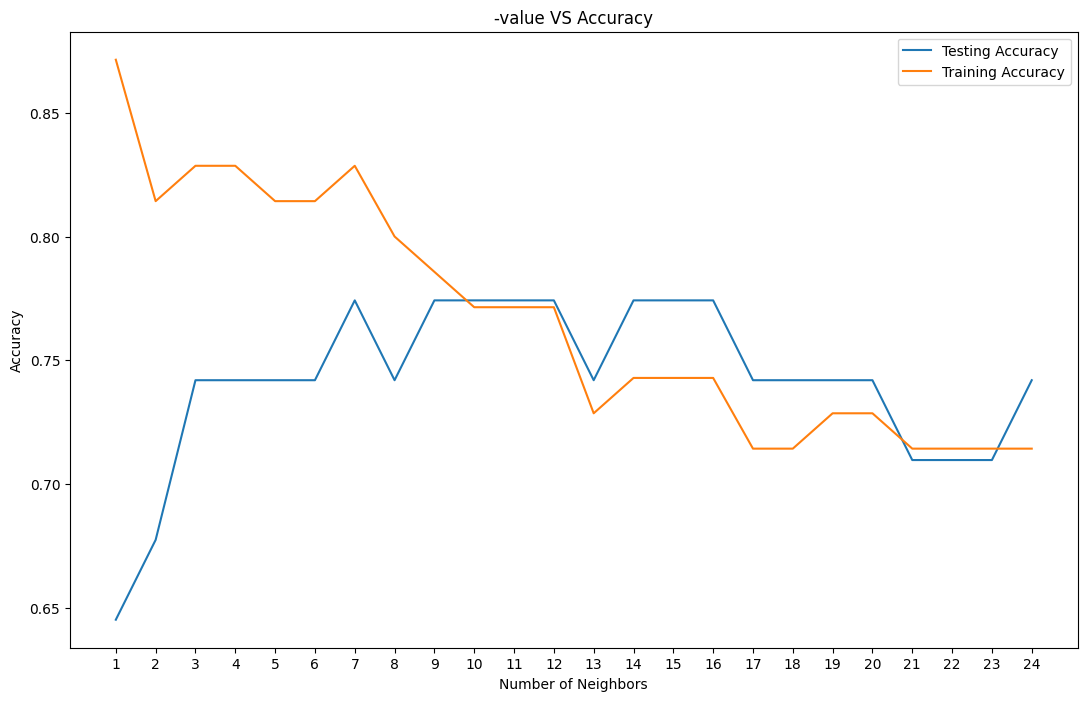

Best accuracy is 0.7741935483870968 with K = 7


In [128]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# Q2)

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [82]:
zoo = pd.read_csv('/content/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [83]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [84]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [85]:
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [86]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [87]:
# change the venomous one into frog2 to seperate 2 kinds of frog 
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

<ipython-input-87-f3abc8065ca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"


In [88]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [89]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [90]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [91]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

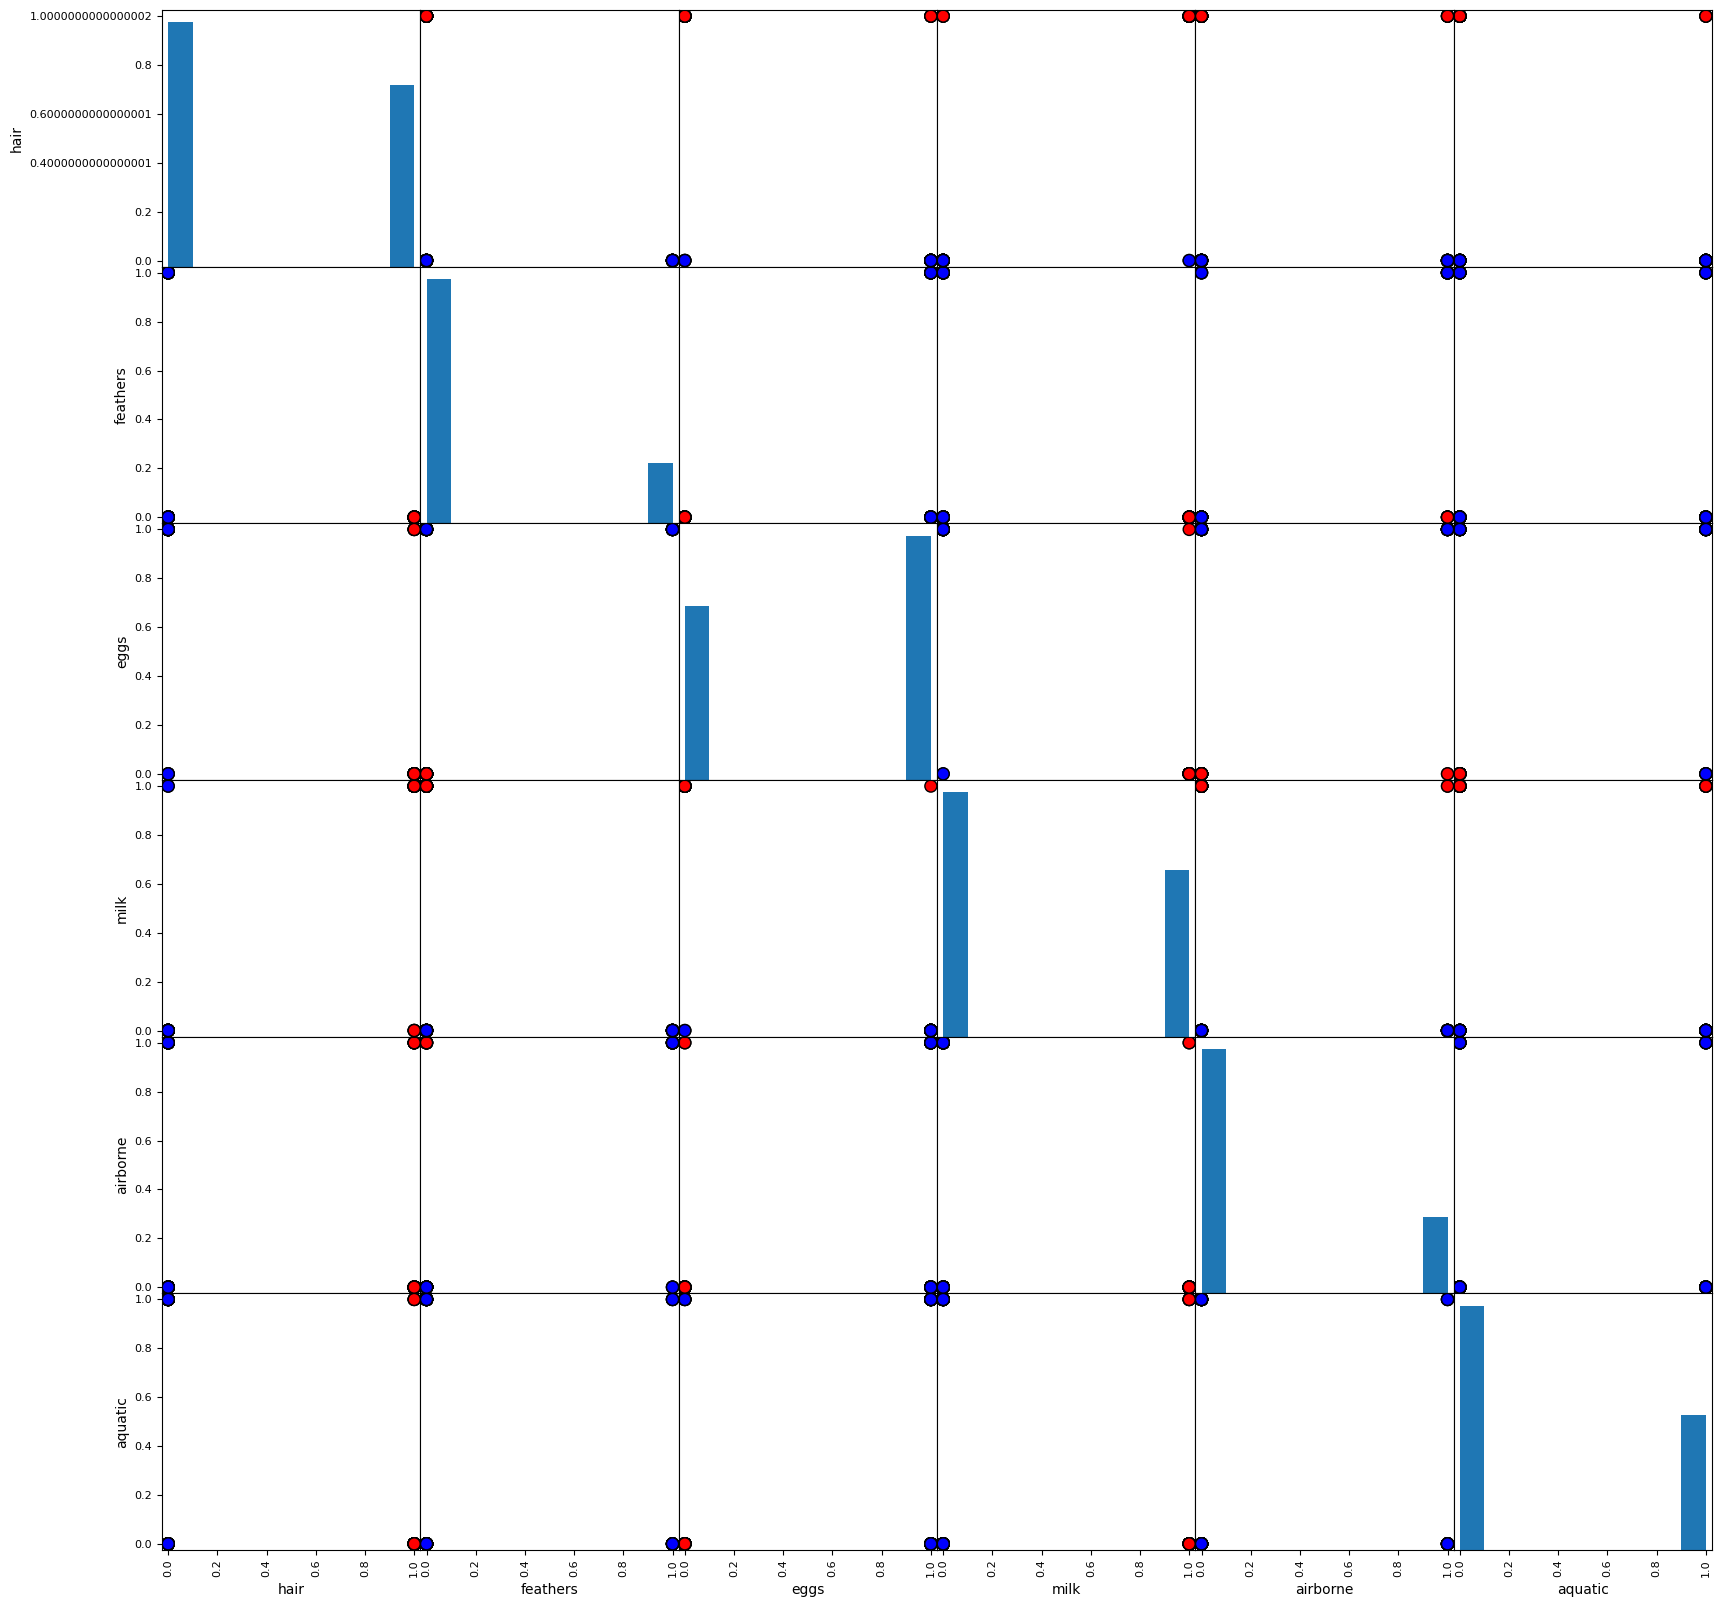

In [92]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,:7],c=color_list,figsize= [20,20],diagonal='hist',alpha=1,s = 300,marker = '.',edgecolor= "black")
plt.show()

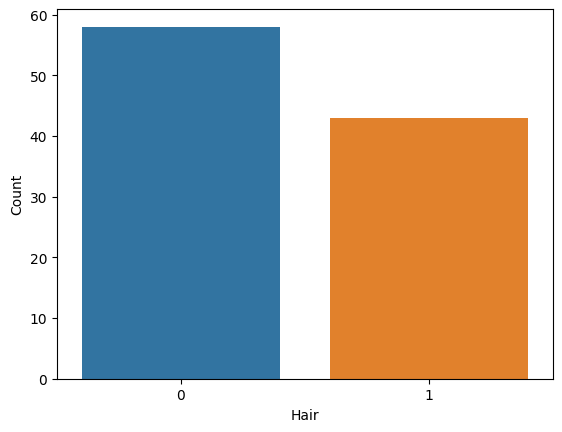

0    58
1    43
Name: hair, dtype: int64

In [93]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

[]

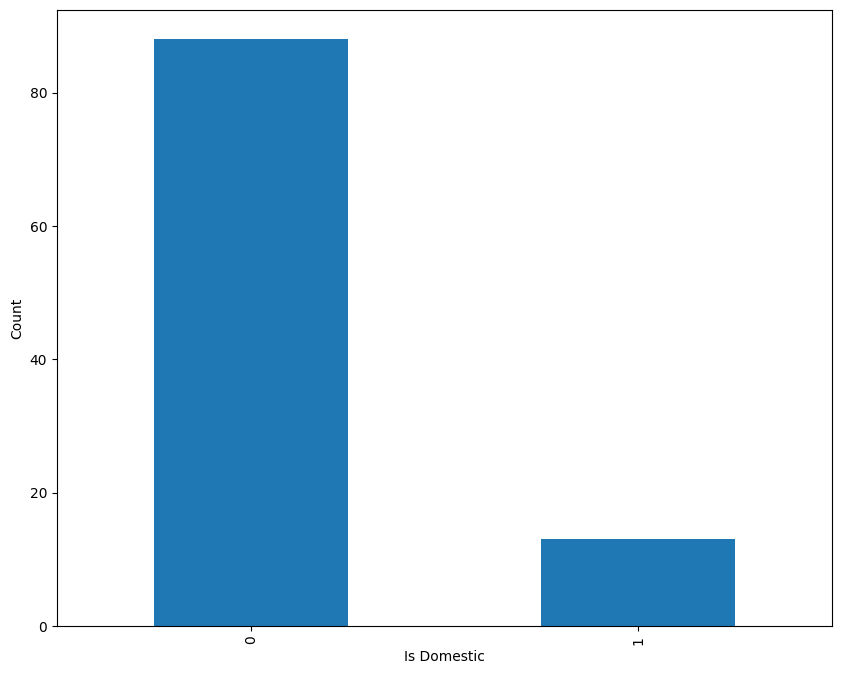

In [94]:
# plot shows how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [95]:
# So we can see mostly animals are not domestic.
zoo['domestic'].value_counts()

0    88
1    13
Name: domestic, dtype: int64

13 Domestic Animals

In [96]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


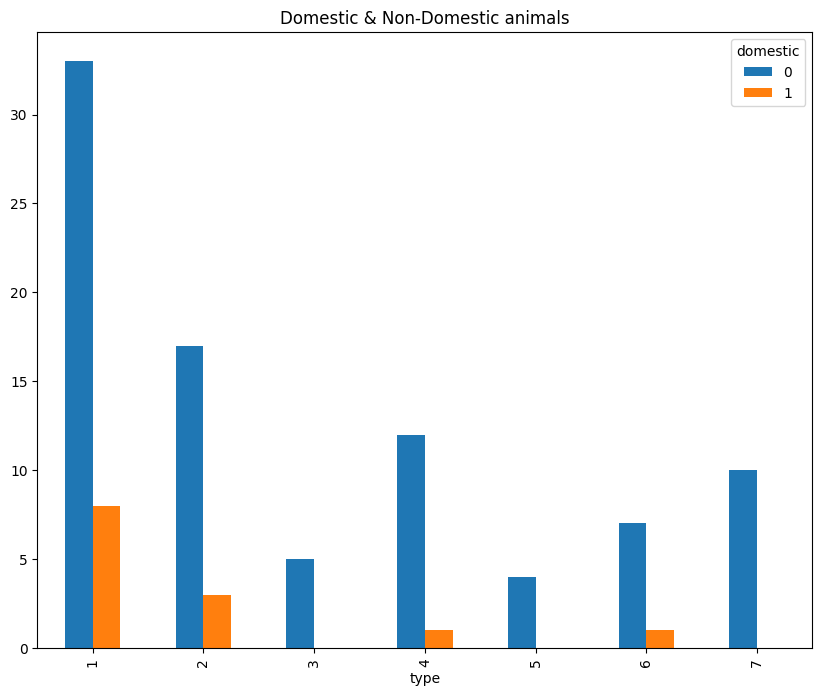

In [97]:
# Domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Domestic & Non-Domestic animals");
plt.plot();

In [98]:
# How many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

41 Animals provied Milk

In [99]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


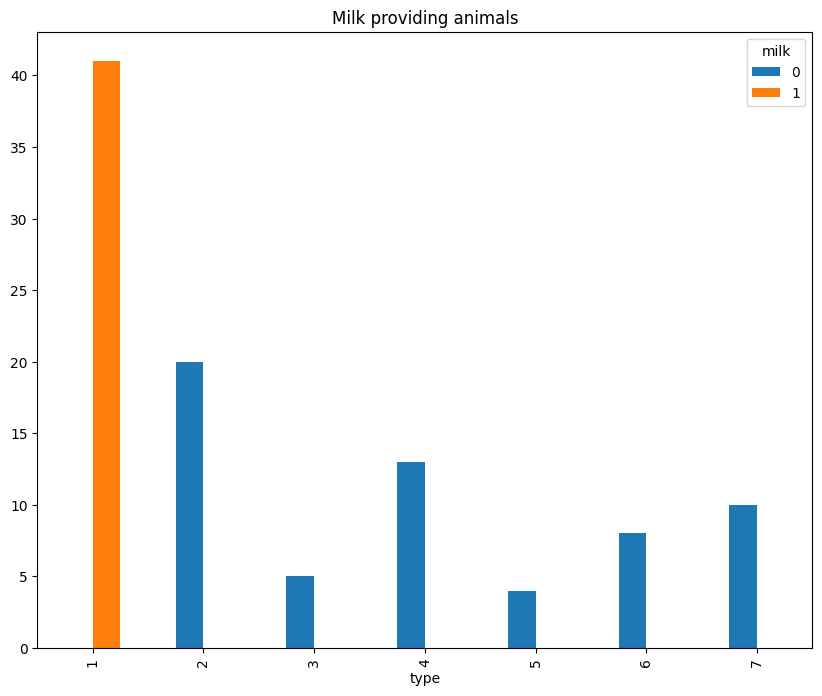

In [100]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Milk providing animals");
plt.plot();

In [101]:
# How many animals live under water
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

36 aquatic animals are there.

In [102]:
pd.crosstab(zoo['type'], zoo['aquatic'])

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,4
6,8,0
7,4,6


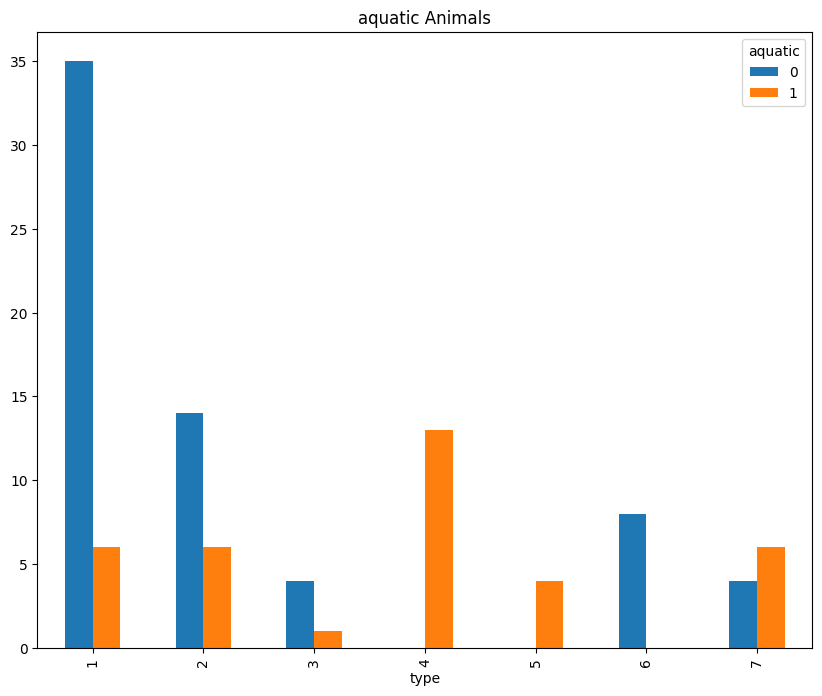

In [103]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8), title="aquatic Animals");

In [104]:
# How many animals can Fly
zoo.airborne.value_counts()

0    77
1    24
Name: airborne, dtype: int64

In [105]:
pd.crosstab(zoo['type'], zoo['airborne'])

airborne,0,1
type,,
1,39,2
2,4,16
3,5,0
4,13,0
5,4,0
6,2,6
7,10,0


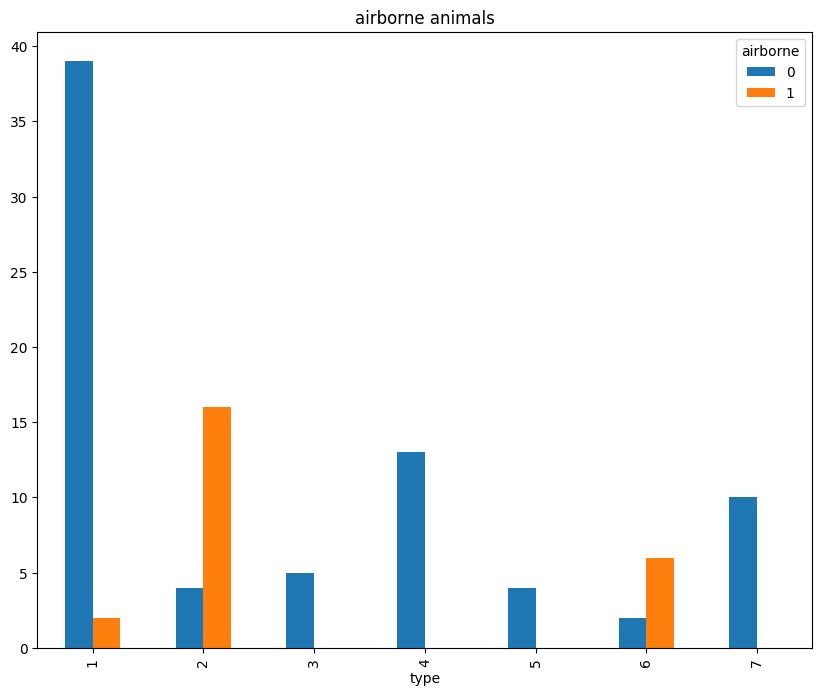

In [106]:
pd.crosstab(zoo['type'], zoo['airborne']).plot(kind="bar", figsize=(10, 8), title="airborne animals");
plt.plot();

Independent and Dependent Variables

In [107]:
x=  zoo.iloc[:,1:16].values
y = zoo.iloc[:,16].values

In [108]:
x

array([[1, 0, 0, ..., 4, 0, 0],
       [1, 0, 0, ..., 4, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 4, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 2, 1, 0]])

In [109]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [110]:
# Splitting the Data into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [111]:
x_train

array([[0, 1, 1, ..., 2, 1, 0],
       [0, 1, 1, ..., 2, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 2, 1, 0],
       [1, 0, 0, ..., 4, 1, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [112]:
x_test

array([[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 8, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1,

In [113]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0])

In [114]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

MACHINE LEARNING ALGORITHM

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

0    23
1     8
dtype: int64

In [117]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,16,1
1,7,7


In [118]:
np.mean(preds==y_test)

0.7419354838709677

In [119]:
model.score(x_train,y_train)

0.8285714285714286

In [120]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 74.19354838709677


In [121]:
num_folds = 10
kfold = KFold(n_splits=10)

In [122]:
results = cross_val_score(model, x, y, cv=kfold)

In [123]:
print(results.mean())

0.7027272727272726


Grid Search for Algorithm Tuning

In [124]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [125]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [126]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


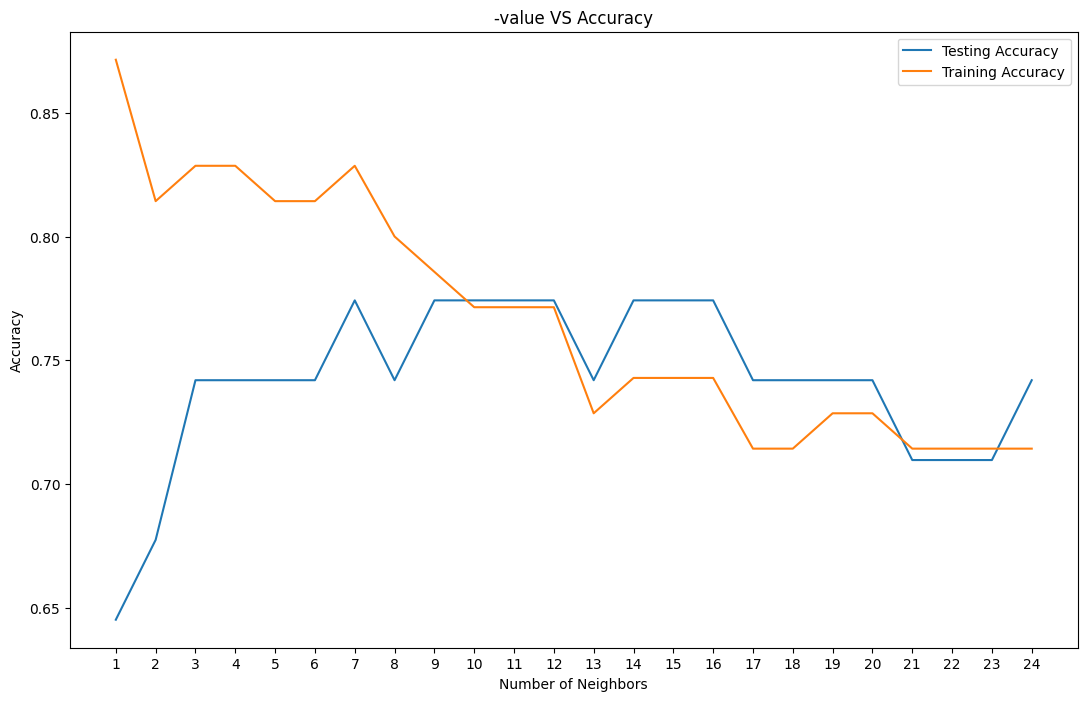

Best accuracy is 0.7741935483870968 with K = 7


In [127]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
